In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

import warnings 
warnings.filterwarnings('ignore')

### Importing The DataSet

In [2]:
df_train = pd.read_excel(r"C:\Users\lokes\OneDrive\Desktop\ml project\flight price\Data_Train.xlsx")
df_test = pd.read_excel(r"C:\Users\lokes\OneDrive\Desktop\ml project\flight price\Test_set.xlsx")

In [3]:
pd.set_option('display.max_column',200)

In [4]:
print(df_train.shape)
print(df_test.shape)

(10683, 11)
(2672, 10)


Out train dataset Contains 10683 rpws and 11 columns , in the test 2671 rows 10 columns.

In [5]:
df_train.head() # observing the 5 rows of the train data set

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df_test.head() # observing the 5 rows of the test data set

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2672 non-null   object
 1   Date_of_Journey  2672 non-null   object
 2   Source           2672 non-null   object
 3   Destination      2672 non-null   object
 4   Route            2672 non-null   object
 5   Dep_Time         2672 non-null   object
 6   Arrival_Time     2672 non-null   object
 7   Duration         2672 non-null   object
 8   Total_Stops      2672 non-null   object
 9   Additional_Info  2672 non-null   object
dtypes: object(10)
memory usage: 208.9+ KB


In [9]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Null Value Treatment:

In found only 2 columns in train dataset where 1-1 null values present hence we can drop the entire row using below dropna method.

In [11]:
df_train.dropna(axis=0,inplace=True) # droping the bull value

In [12]:
df_train.isnull().sum() #rechecking the null value if any

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
df_train.shape # shape of data

(10682, 11)

### Exploratry Data Analysis :

converting date into datetime format:

In [14]:
df_train["Date_of_Journey"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day 

In [15]:
df_test["Date_of_Journey"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day

As per abobve code we are converting date time into date time format and keeping only day.similarly we will create additional
colunmns by converting the 'Dep_Time' , 'Arrival_Time'.

In [16]:
#for departure hours
df_train["Dep_hour"] = pd.to_datetime(df_train.Dep_Time).dt.hour

#for departure min
df_train["Dep_min"] = pd.to_datetime(df_train.Dep_Time).dt.minute

In [17]:
df_train.drop(["Dep_Time"] , axis=1 ,inplace=True) #droping the 'Dep_Time' column because we have created the additional col

In [18]:
#for departure hours in our test datset
df_test["Dep_hour"] = pd.to_datetime(df_test.Dep_Time).dt.hour

#for departure min in our test datset
df_test["Dep_min"] = pd.to_datetime(df_test.Dep_Time).dt.minute

In [19]:
df_test.drop(["Dep_Time"] , axis=1,inplace=True) #droping the 'Dep_Time' column because we have created the additional col.drop(["Dep_Time"] , axis=1 , inplace = True) #droping the 'Dep_Time' column because we have created the additional col.drop(["Dep_Time"] , axis=1 , inplace = True) #droping the 'Dep_Time' column because we have created the additional col

In [20]:
#for departure hours in our test datset
df_train["Arrv_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour

#for departure min in our test datset
df_train["Arrv_min"]= pd.to_datetime(df_train.Arrival_Time).dt.minute

In [21]:
#for departure hours in our test datset
df_test["Arrv_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour

#for departure min in our test datset
df_test["Arrv_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute

In [22]:
df_train.drop(["Arrival_Time"] , axis=1,inplace=True) #droping the 'Arrival_Time' column because we have created the additional col

In [23]:
df_test.drop(["Arrival_Time"] , axis=1,inplace=True) #droping the 'Arrival_Time' column because we have created the additional col

In [24]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrv_hour,Arrv_min
0,IndiGo,24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,1,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,9,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,25,4,25
3,IndiGo,12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,5,23,30
4,IndiGo,1,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,50,21,35


In [25]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_min,Arrv_hour,Arrv_min
0,Jet Airways,6,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,17,30,4,25
1,IndiGo,12,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,6,20,10,20
2,Jet Airways,21,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,19,15,19,0
3,Multiple carriers,21,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,8,0,21,0
4,Air Asia,24,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,23,55,2,45


Now in the duration column values is in 'h' and 'm' we can seprate and create the new column.

In [26]:
duration = list(df_train['Duration']) # converting 'Duration' column innto list

In [27]:
# converted Duration feature into the list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration    

In [28]:
df_train["Duration_hours"] = duration_hours # addiing in dataset
df_train["Duration_mins"] = duration_mins

In [29]:
df_train=df_train.drop(["Duration"] , axis=1) # droping the 'Duration' column

In [30]:
df_train.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrv_hour,Arrv_min,Duration_hours,Duration_mins
0,IndiGo,24,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,22,20,1,10,2,50


In [31]:
duration = list(df_test['Duration']) # converting 'Duration' column innto list

In [32]:
# converted Duration feature into the list
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours_test = []
duration_mins_test = []
for i in range(len(duration)):
    duration_hours_test.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins_test.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration 

In [33]:
df_test["Duration_hours"] = duration_hours_test # addiing in dataset
df_test["Duration_mins"] = duration_mins_test

In [34]:
df_test.drop(["Duration"] , axis=1) # droping the 'Duration' column

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Dep_hour,Dep_min,Arrv_hour,Arrv_min,Duration_hours,Duration_mins
0,Jet Airways,6,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,17,30,4,25,10,55
1,IndiGo,12,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,6,20,10,20,4,0
2,Jet Airways,21,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,19,15,19,0,23,45
3,Multiple carriers,21,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8,0,21,0,13,0
4,Air Asia,24,Banglore,Delhi,BLR → DEL,non-stop,No info,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,IndiGo,27,Kolkata,Banglore,CCU → BLR,non-stop,No info,14,20,16,55,2,35
2668,Jet Airways,6,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,50,4,25,6,35
2669,Air India,6,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,4,0,19,15,15,15
2670,Multiple carriers,15,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,4,55,19,15,14,20


In [35]:
df_test.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_hour,Dep_min,Arrv_hour,Arrv_min,Duration_hours,Duration_mins
0,Jet Airways,6,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,17,30,4,25,10,55
1,IndiGo,12,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,6,20,10,20,4,0
2,Jet Airways,21,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,19,15,19,0,23,45


As we can check we have created the new columns and deleted the 'Duration' column.

### Encoding Categorical Data:

In [36]:
df_train["Airline"].value_counts() # checking unique values counts in train data set

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [37]:
df_test["Airline"].value_counts() # checking unique values counts in test data set

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Trujet                                 1
Name: Airline, dtype: int64

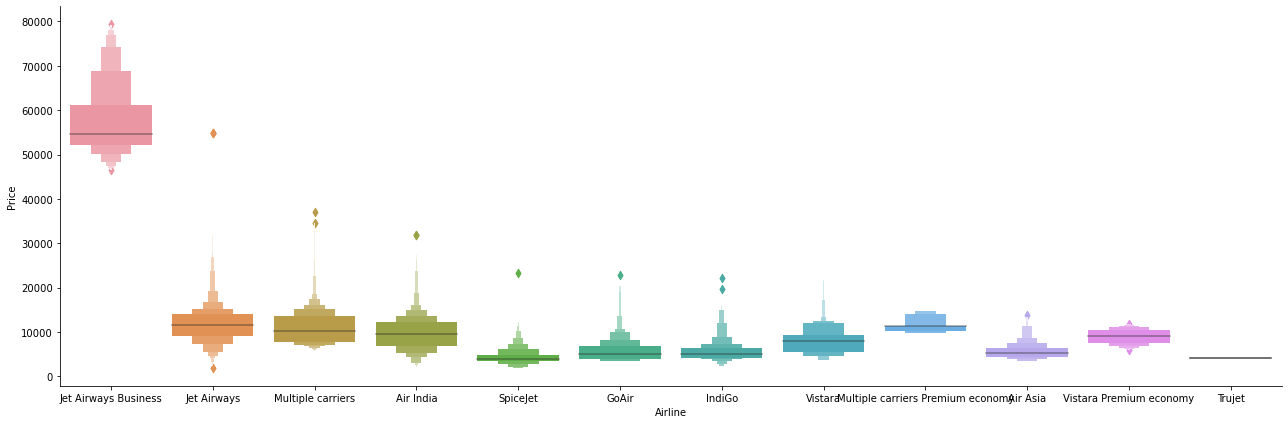

In [38]:
#checking the price as per respective airlines 
sns.catplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Here jet airways showing the higest price and truejet shows lowest.indigo and go-airways ,spicejet almost similer price.

In [39]:
df_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

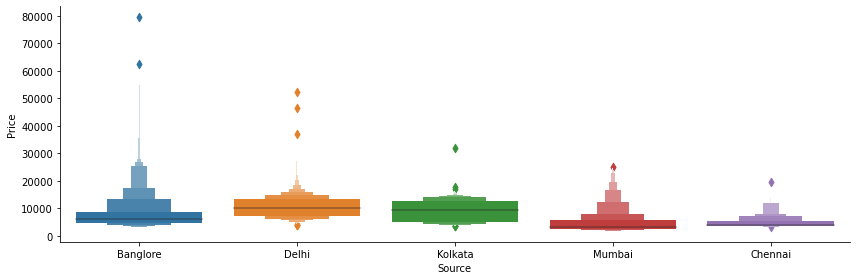

In [40]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [41]:
df_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [42]:
# df_train["Total_Stops"].value_counts()

In [43]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys
df_train['Total_Stops']=df_train['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [44]:
df_test['Total_Stops']=df_test['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [45]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df_train=df_train.drop(["Route", "Additional_Info"], axis = 1)

In [46]:
df_test=df_test.drop(["Route", "Additional_Info","Duration"], axis = 1)

In [47]:
# df_train=pd.get_dummies(df_train,drop_first=True)

In [48]:
# df_test=pd.get_dummies(df_test,drop_first=True)

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

In [51]:
df_train.Airline=le.fit_transform(df_train.Airline)
df_train.Source=le.fit_transform(df_train.Source)
df_train.Destination=le.fit_transform(df_train.Destination)

In [52]:
df_test.Airline=le.fit_transform(df_test.Airline)
df_test.Source=le.fit_transform(df_test.Source)
df_test.Destination=le.fit_transform(df_test.Destination)

In [53]:
df_train.shape

(10682, 12)

In [54]:
df_test.shape

(2672, 11)

In [55]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrv_hour,Arrv_min,Duration_hours,Duration_mins
0,3,24,0,5,0,3897,22,20,1,10,2,50
1,1,1,3,0,2,7662,5,50,13,15,7,25
2,4,9,2,1,2,13882,9,25,4,25,19,0
3,3,12,3,0,1,6218,18,5,23,30,5,25
4,3,1,0,5,1,13302,16,50,21,35,4,45


### Outlairs Dectection and Removel :

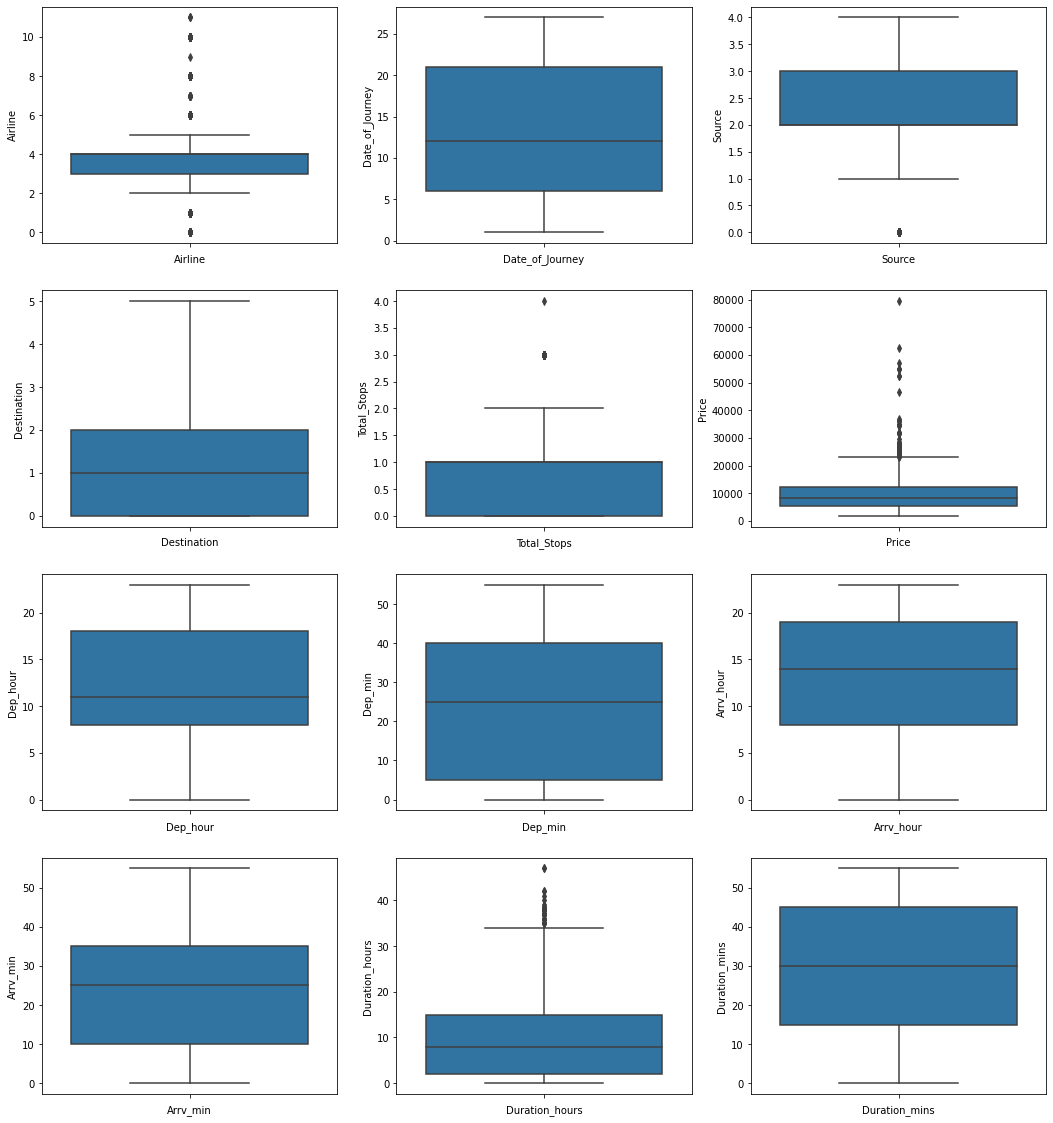

In [56]:
# Checking the distribution of data
plt.figure(figsize=(18,20))
plotnumber=1
for column in df_train:
    if plotnumber <=13:
        plt.subplot(4,3,plotnumber)
        sns.boxplot(df_train[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

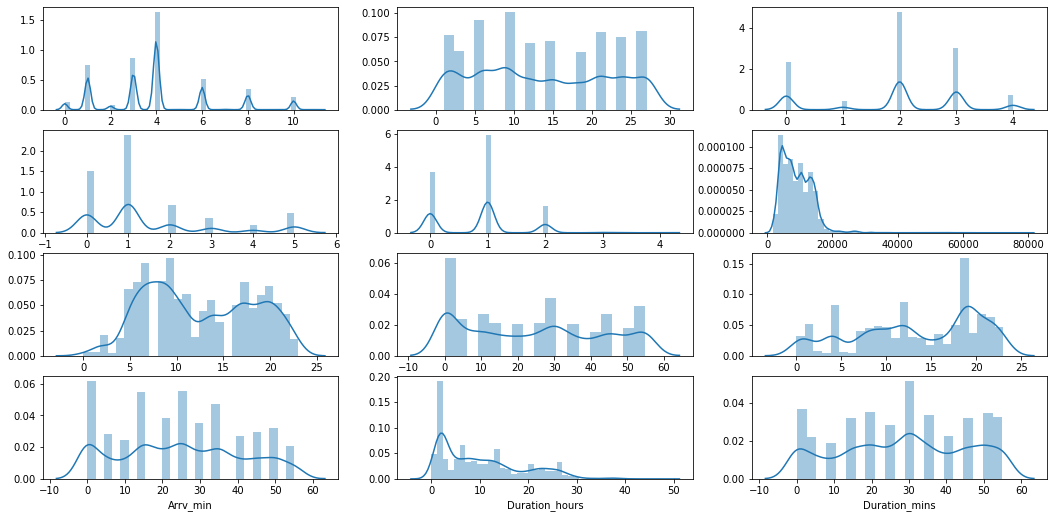

In [57]:
# Checking the distribution of data
plt.figure(figsize=(18,20))
plotnumber=1
for column in df_train:
    if plotnumber <=26:
        plt.subplot(9,3,plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

In [58]:
from sklearn.preprocessing import PowerTransformer #usinh power transfer for outlairs removel

In [59]:
power = PowerTransformer(method='yeo-johnson')

In [60]:
df_train['Airline'] = power.fit_transform(df_train['Airline'].values.reshape(-1,1))
df_train['Source'] = power.fit_transform(df_train['Source'].values.reshape(-1,1))
df_train['Total_Stops'] = power.fit_transform(df_train['Total_Stops'].values.reshape(-1,1))
df_train['Duration_hours'] = power.fit_transform(df_train['Duration_hours'].values.reshape(-1,1))

In [61]:
df_test['Airline'] = power.fit_transform(df_test['Airline'].values.reshape(-1,1))
df_test['Source'] = power.fit_transform(df_test['Source'].values.reshape(-1,1))
df_test['Total_Stops'] = power.fit_transform(df_test['Total_Stops'].values.reshape(-1,1))
df_test['Duration_hours'] = power.fit_transform(df_test['Duration_hours'].values.reshape(-1,1))

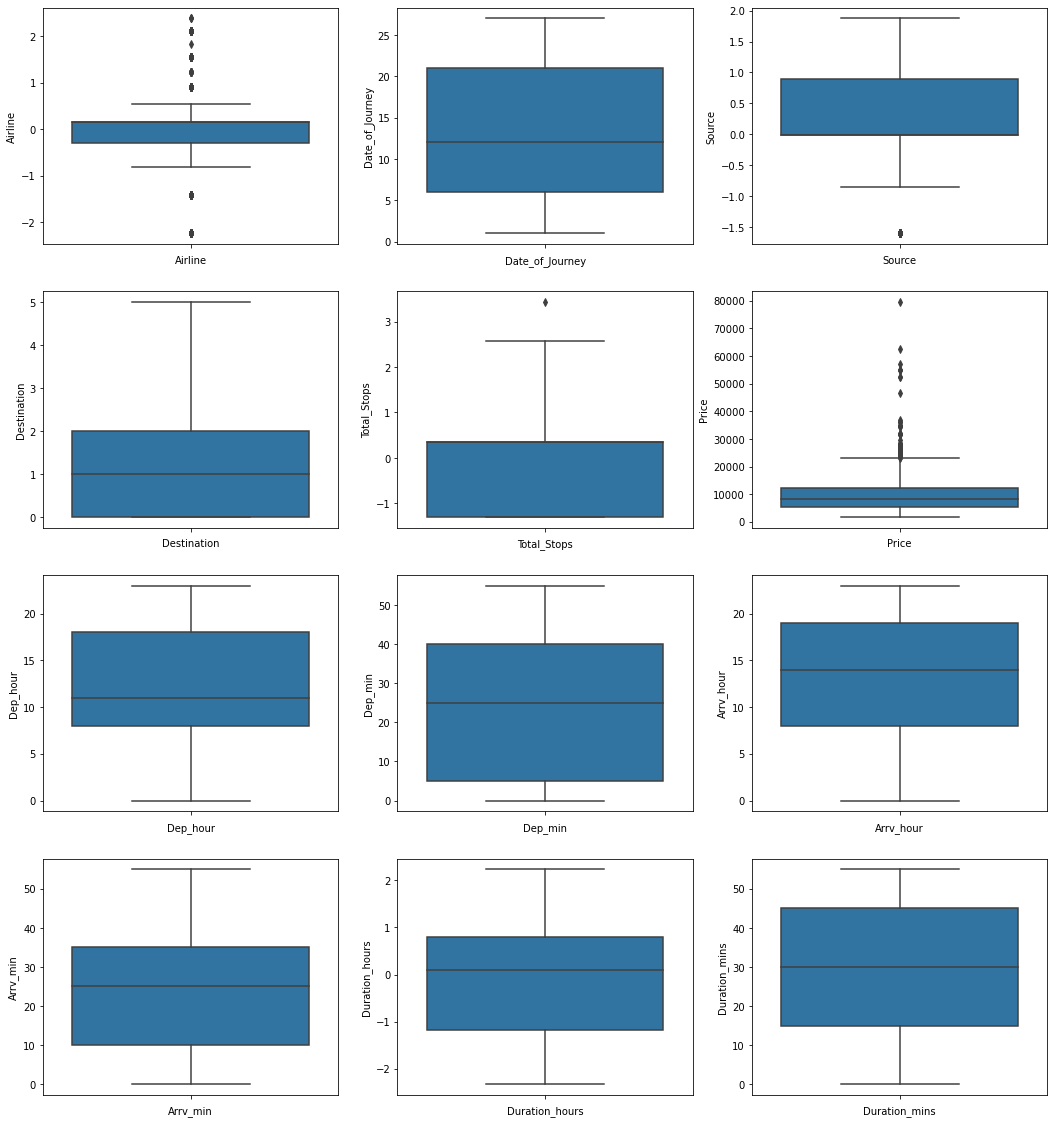

In [62]:
# Checking the distribution of data
plt.figure(figsize=(18,20))
plotnumber=1
for column in df_train:
    if plotnumber <=13:
        plt.subplot(4,3,plotnumber)
        sns.boxplot(df_train[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

I have iused power transfermation for only 4 columns and our almost outlirs has been removed.

### Feature Selection :

In [63]:
from sklearn.ensemble import ExtraTreesRegressor #using 'ExtraTreesClassifier' for feature selection

In [64]:
X_feature = df_train.drop(columns=['Price'],axis=1) 
y_feature = df_train['Price']

In [65]:
model = ExtraTreesRegressor()

In [66]:
model.fit(X_feature,y_feature)

ExtraTreesRegressor()

In [67]:
fearures_rank = pd.Series(model.feature_importances_,index=X_feature.columns)
fearures_rank

Airline            0.148069
Date_of_Journey    0.144164
Source             0.021411
Destination        0.044606
Total_Stops        0.284852
Dep_hour           0.033382
Dep_min            0.030903
Arrv_hour          0.035454
Arrv_min           0.034650
Duration_hours     0.196186
Duration_mins      0.026324
dtype: float64

As per above feature selection i found features like 'Airline' , 'Date_of_Journey','Total_Stops','Duration_hours',contributing the most in order to predict our target variable

Here we have preprocess the data now our almost features are in binory so will will not remove the outliars.

In [68]:
from sklearn.preprocessing import StandardScaler # now we have to convert data into same scale.
from sklearn.model_selection import train_test_split # for split the data into train and test

In [69]:
X = df_train.drop(columns=['Price','Source','Duration_mins','Source'],axis=1) #dividing data for train
y = df_train['Price']

In [70]:
print("Shape of X", X.shape)
print("Shape of Y", y.shape)

Shape of X (10682, 9)
Shape of Y (10682,)


In [71]:
# Scaling the features using standardscaler
scaler = StandardScaler()

In [72]:
x_scale =  scaler.fit_transform(X)

In [73]:
X_train, X_test, y_train, y_test  = train_test_split(x_scale, y, test_size=0.30,random_state=42) #spliting into train & test

### Model Building

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [75]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()
svm=SVR()
gboost=GradientBoostingRegressor()
xgboost=XGBRegressor()
print("Model is created")

Model is created


In [76]:
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
adb.fit(X_train, y_train)
svm.fit(X_train, y_train)
gboost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
print("Model is trained")

Model is trained


In [77]:
print("lr_score",lr.score(X_train, y_train))
print("knn_score",knn.score(X_train, y_train))
print("dt_score",dt.score(X_train, y_train))
print("rf_score",rf.score(X_train, y_train))
print("adb_score",adb.score(X_train, y_train))
print("svm_score",svm.score(X_train, y_train))
print("gboost_score",gboost.score(X_train, y_train))
print("xgboost_score",xgboost.score(X_train, y_train))

lr_score 0.4468848576364074
knn_score 0.7798067165646914
dt_score 0.9415272535686194
rf_score 0.9238136663967058
adb_score 0.22287984991573995
svm_score 0.04937640412619948
gboost_score 0.7288912693146656
xgboost_score 0.9012874126231919


### Model Evaluation

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [79]:
lr_pred_y = lr.predict(X_test)
knn_pred_y = knn.predict(X_test)
dt_pred_y = dt.predict(X_test)
rf_pred_y = rf.predict(X_test)
adb_pred_y = adb.predict(X_test)
svm_pred_y = svm.predict(X_test)
gboost_pred_y = svm.predict(X_test)
xgboost_pred_y = svm.predict(X_test)

In [80]:
print("lr_score",mean_squared_error(y_test,lr_pred_y))
print("knn_score",mean_squared_error(y_test,knn_pred_y))
print("dt_score",mean_squared_error(y_test,dt_pred_y))
print("rf_score",mean_squared_error(y_test,rf_pred_y))
print("adb_score",mean_squared_error(y_test,adb_pred_y))
print("svm_score",mean_squared_error(y_test,svm_pred_y))
print("gboost_score",mean_squared_error(y_test,gboost_pred_y))
print("xgboost_score",mean_squared_error(y_test,xgboost_pred_y))

lr_score 10452646.024933249
knn_score 5814961.845928238
dt_score 8099961.3138211565
rf_score 5504234.574538013
adb_score 17244210.134879977
svm_score 19175282.73805403
gboost_score 19175282.73805403
xgboost_score 19175282.73805403


### CrossValidation :

In [81]:
from sklearn.model_selection import KFold,cross_val_score

In [82]:
k_f = KFold(n_splits=5,shuffle=True)
k_f

KFold(n_splits=5, random_state=None, shuffle=True)

In [83]:
print("Cross validation score for lr model","=>",cross_val_score(lr,x_scale,y,cv=5).mean())
print("Cross validation score for knn model","=>",cross_val_score(knn,x_scale,y,cv=5).mean())
print("Cross validation score for dt model","=>",cross_val_score(dt,x_scale,y,cv=5).mean())
print("Cross validation score for rf model","=>",cross_val_score(rf,x_scale,y,cv=5).mean())
print("Cross validation score for adb model","=>",cross_val_score(adb,x_scale,y,cv=5).mean())
print("Cross validation score for svm model","=>",cross_val_score(svm,x_scale,y,cv=5).mean())
print("Cross validation score for gboost model","=>",cross_val_score(gboost,x_scale,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,x_scale,y,cv=5).mean())

Cross validation score for lr model => 0.4579424110283422
Cross validation score for knn model => 0.6927625626522472
Cross validation score for dt model => 0.612408643203333
Cross validation score for rf model => 0.7378546410778334
Cross validation score for adb model => 0.24041902684637434
Cross validation score for svm model => 0.06118492543932992
Cross validation score for gboost model => 0.7105537347261685
Cross validation score for xgboost model => 0.7817650230012012


As per above usage matrics we found our xgboost model only came with positive output.and other model not giving the desirable scores.lets see the hyperparameter tuing and check if we could increase our models accuracy.

### HyperParameter Tuning :

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
xgboost.get_params().keys()  # to check the parameters

dict_keys(['objective', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [86]:
param_grid = {'objective':['reg:squarederror'],
         'max_depth': [6], 
         'colsample_bylevel':[0.2,0.5],
         'learning_rate':[0.01],
         'random_state':[20]}
param_grid

{'objective': ['reg:squarederror'],
 'max_depth': [6],
 'colsample_bylevel': [0.2, 0.5],
 'learning_rate': [0.01],
 'random_state': [20]}

In [87]:
gridsearch = GridSearchCV(xgboost,param_grid = param_grid,cv=3,verbose = 2 ,n_jobs =4)

In [88]:
gridsearch.fit(X_train,y_train) #hyper tuing for "Next_Tmax" label

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=2,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [89]:
gridsearch.best_params_

{'colsample_bylevel': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'objective': 'reg:squarederror',
 'random_state': 20}

In [90]:
Xgboost_reg=XGBRegressor(colsample_bylevel=0.5,learning_rate=0.01,max_depth=6,objective='reg:squarederror',random_state=20)

In [91]:
Xgboost_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=20,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
y_pred_xgboost = Xgboost_reg.predict(X_test)

In [93]:
mean_squared_error(y_test,y_pred_xgboost)

18727054.446851466

As observed i am getting good accuarcy without hyperparameter tuing.so saving model both models without hypermeter tuning.

### Model saving

In [95]:
import pickle

In [96]:
Flight_price = 'Flight_price.pickle'

In [97]:
pickle.dump(xgboost,open(Flight_price,'wb'))

Predicting test data using saved model:

In [98]:
loaded_model = pickle.load(open(Flight_price, 'rb'))

In [99]:
df_test = df_test.drop(columns=['Source','Duration_mins','Source'],axis=1)

'''in our saved model we have removed above 3 columns as per feature selection technique it was less related to with 
   the label data
'''

'in our saved model we have removed above 3 columns as per feature selection technique it was less related to with \n   the label data\n'

In [100]:
scaler = StandardScaler(df_test)  #now will scale the test data

In [101]:
df_test.shape

(2672, 9)

In [102]:
loaded_model.predict(df_test)

array([1650.6465, 3333.8254, 6808.0864, ..., 6505.68  , 3856.0957,
       1914.4575], dtype=float32)

### Thank You !